# **Volcanic Eruption**

****

In [1]:
#@title **Load libs** { display-mode: "form" }
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
pd.__version__

'2.0.3'

In [2]:
#@title **MONTAR EL DRIVE** { display-mode: "form" }
import os
from google.colab import drive

path_ai = "Project_IA" #@param {type:"string"}
path = "/content/drive/My Drive/" + path_ai
drive.mount('/content/drive')
os.chdir(path)
print(os.getcwd())

Mounted at /content/drive
/content/drive/My Drive/Project_IA


In [3]:
#@title **code** Loading and inspecting
dt =  pd.read_csv('data/volcano.csv',sep=",")

In [13]:
#@title **code** Dsiplay data, see columns and shape
print("columns and shape", dt.columns, dt.shape)

dt.head()

columns and shape Index(['VolcanoID', 'V_Name', 'Country', 'Region', 'Subregion', 'Latitude',
       'Longitude', 'PEI', 'H_active', 'VEI_Holoce', 'hazard', 'class',
       'risk'],
      dtype='object') (1546, 13)


,VolcanoID,V_Name,Country,Region,Subregion,Latitude,Longitude,PEI,H_active,VEI_Holoce,hazard,class,risk
0,210010,West Eifel Volcanic Field,Germany,Mediterranean and W Asia,Western Europe,50.170,6.85,6,0,9.0,0.0,1,0.0
1,210020,Cha?ne des Puys,France,Mediterranean and W Asia,Western Europe,45.775,2.97,7,0,9.0,0.0,1,0.0
2,210030,Olot Volcanic Field,Spain,Mediterranean and W Asia,Western Europe,42.170,2.53,5,0,10.0,0.0,2,0.0
3,210040,Calatrava Volcanic Field,Spain,Mediterranean and W Asia,Western Europe,38.870,-4.02,6,0,9.0,0.0,1,0.0
4,211001,Larderello,Italy,Mediterranean and W Asia,Italy,43.250,10.87,4,0,3.0,0.0,1,0.0


In [6]:
# dt["H_active"].unique()
# dt["V_Name"].unique()
# dt["Subregion"].unique()
# dt["class"].unique()
#dt["PEI"].unique()
dt["hazard"].unique()

array([nan,  3.,  1.,  2.])

In [ ]:
#@title **code** `describe() to show statistics
dt.describe()

,VolcanoID,Latitude,Longitude,PEI,H_active,VEI_Holoce,hazard,class,risk
count,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000
mean,295867.385511,14.369728,24.930272,3.095731,0.385511,6.728331,0.394567,1.604787,0.363519
std,49124.026936,31.773402,112.847466,1.700149,0.486873,3.622645,0.847350,1.020034,0.784024
min,210010.000000,-78.500000,-179.970000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,261055.000000,-6.770000,-77.614500,2.000000,0.000000,3.000000,0.000000,1.000000,0.000000
50%,290355.000000,14.011000,39.155000,2.000000,0.000000,9.000000,0.000000,2.000000,0.000000
75%,342087.500000,41.935500,138.532750,4.000000,1.000000,10.000000,0.000000,2.000000,0.000000
max,390140.000000,88.270000,179.580000,7.000000,1.000000,10.000000,3.000000,3.000000,3.000000


In [ ]:
#@title **code** `info()`
# get the description of data
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1546 entries, 0 to 1545
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   VolcanoID   1546 non-null   int64  
 1   V_Name      1546 non-null   object 
 2   Country     1546 non-null   object 
 3   Region      1546 non-null   object 
 4   Subregion   1546 non-null   object 
 5   Latitude    1546 non-null   float64
 6   Longitude   1546 non-null   float64
 7   PEI         1546 non-null   int64  
 8   H_active    1546 non-null   int64  
 9   VEI_Holoce  1546 non-null   float64
 10  hazard      1546 non-null   float64
 11  class       1546 non-null   int64  
 12  risk        1546 non-null   float64
dtypes: float64(5), int64(4), object(4)
memory usage: 157.1+ KB


In [10]:


# dt[['risk', 'class', 'hazard']].fillna(0, inplace = True)
dt['risk'].fillna(0, inplace = True)
dt['class'].fillna(0, inplace = True)
dt['hazard'].fillna(0, inplace = True)

dt["class"] = dt["class"].replace(["U-HR", "U-NHHR", "U-HHR"], [1, 2, 3])
dt["VEI_Holoce"] = dt["VEI_Holoce"].replace(["Unknown VEI", "No confirmed eruptions"], [9,10])
dt['VEI_Holoce'] = dt['VEI_Holoce'].astype('float64')

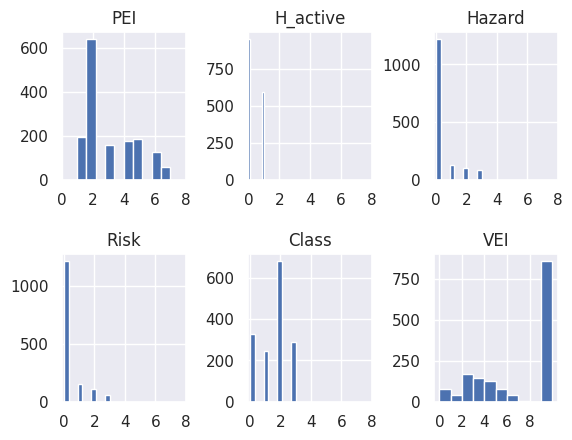

In [ ]:
#@title **code**
from matplotlib import pyplot as plt
fig, axs = plt.subplots(2,3)
axs[0,0].hist(dt['PEI'])
axs[0,0].set_title('PEI')
axs[0,1].hist(dt['H_active'])
axs[0,1].set_title('H_active')
axs[0,2].hist(dt['hazard'])
axs[0,2].set_title('Hazard')
axs[1,0].hist(dt['risk'])
axs[1,0].set_title('Risk')
axs[1,1].hist(dt['class'])
axs[1,1].set_title('Class')
axs[1,2].hist(dt['VEI_Holoce'])
axs[1,2].set_title('VEI')

for ax in axs.flat:
    loc = np.arange(0, 9, step=2)  # Change the step value to your desired value
    ax.set_xticks(loc)

fig.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()



plt.show()

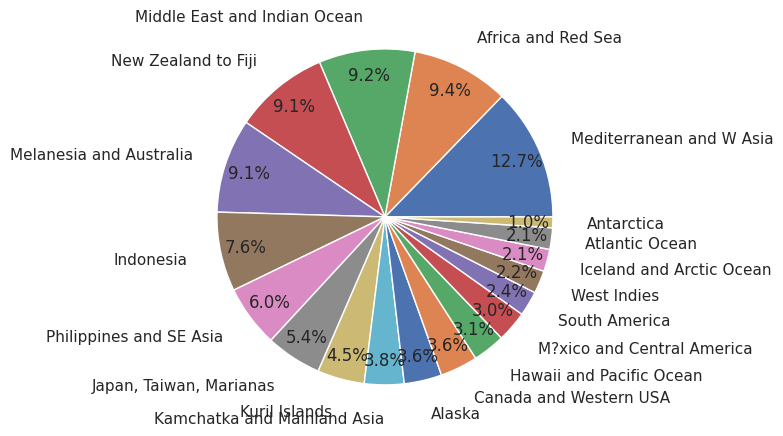

In [ ]:
import matplotlib.pyplot as plt

countries = dt['Region'].unique()
countries_count = dt['Region'].value_counts()

plt.pie(countries_count, labels=countries, autopct='%1.1f%%', pctdistance=0.85, labeldistance= 1.2)
plt.axis('equal')
plt.show()

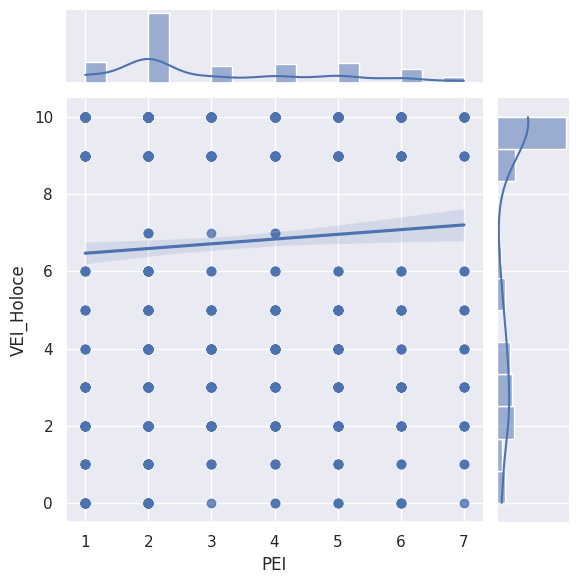

In [ ]:
sns.jointplot(x="PEI", y="VEI_Holoce", data=dt, kind='reg');

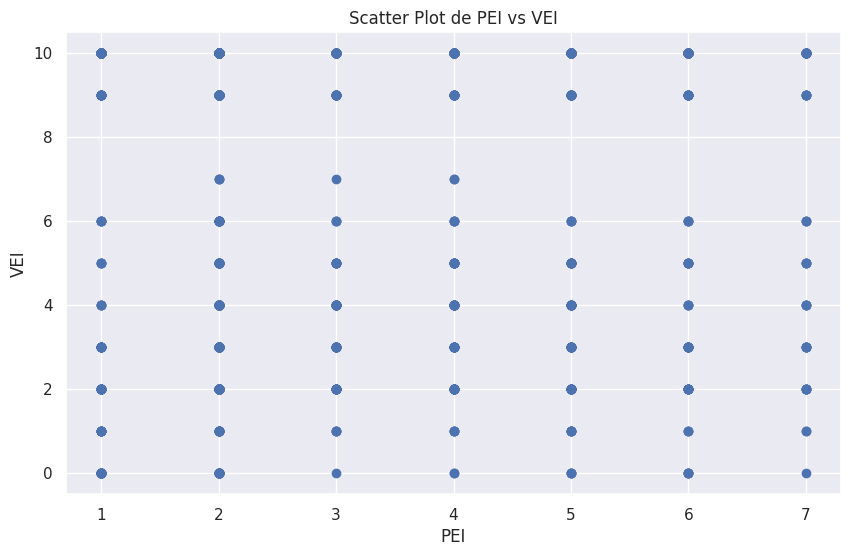

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(10, 6))  # Opcional: especifica el tamaño del gráfico
plt.scatter(dt['PEI'], dt['VEI_Holoce'])  # Crea el scatter plot con las dos columnas

# Para añadir títulos y etiquetas a los ejes
plt.title('Scatter Plot de PEI vs VEI')
plt.xlabel('PEI')
plt.ylabel('VEI')

# Mostrar el gráfico
plt.show()

# **DecisionTreeRegressor by default**

MSE:  1.4096774193548387


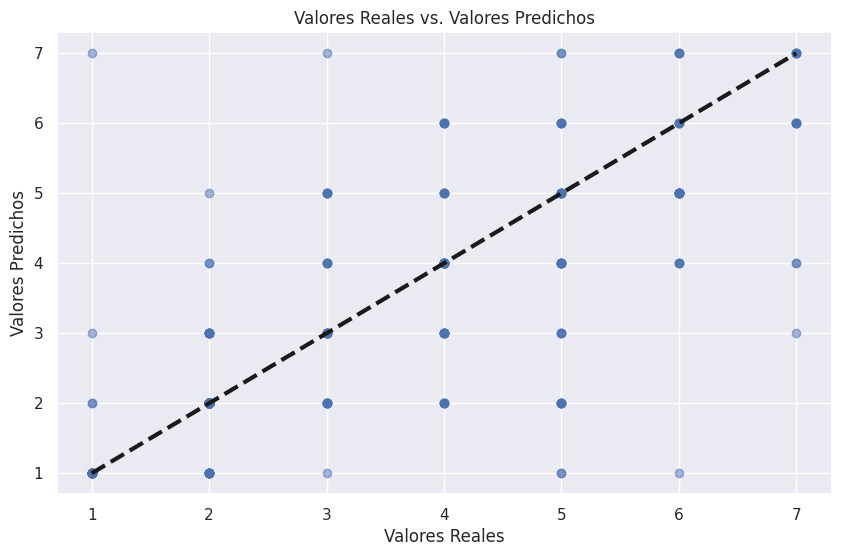

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
np.random.seed(21)


X = dt.drop(["PEI", "VolcanoID", "V_Name", 'Country', "Region", "Subregion"], axis=1)
y = dt["PEI"]

# Identificar columnas con string
object_cols = X.select_dtypes(include=['object']).columns

# Aplicar LabelEncoder a la columnas objeto
label_encoder = LabelEncoder()
for col in object_cols:
    X[col] = label_encoder.fit_transform(X[col])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Calcular las métricas de evaluación
mse = mean_squared_error(y_test, y_pred)

print('MSE: ', mse)

# Gráfica de valores reales vs. valores predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs. Valores Predichos')
plt.show()

# **DecisionTreeRegressor: max-depth and criterion**

MSE:  [1.470699513686883, 1.208291988988342, 1.2585193553306742, 1.2585193553306742, 1.2585193553306742]


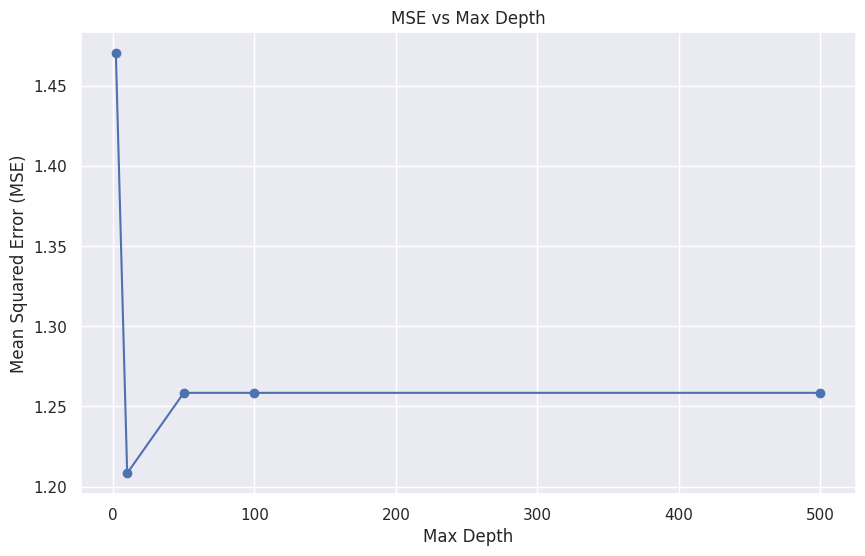

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

np.random.seed(21)


X = dt.drop(["PEI", "VolcanoID", "V_Name", 'Country', "Region", "Subregion"], axis=1)
y = dt["PEI"]

# Identificar columnas con string
object_cols = X.select_dtypes(include=['object']).columns

# Aplicar LabelEncoder a la columnas objeto
label_encoder = LabelEncoder()
for col in object_cols:
    X[col] = label_encoder.fit_transform(X[col])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scores1 = []
for md in [2, 10, 50, 100, 500]:
  est1 = DecisionTreeRegressor(max_depth=md, random_state=21)
  est1.fit(X_train, y_train)
  pred = est1.predict(X_test)
  rmse = np.sqrt(mean_squared_error(y_test,pred))
  scores1.append(rmse)
print('MSE: ',scores1)

max_depth = [2, 10, 50, 100, 500]
# Gráfica de RMSE vs max_depth
plt.figure(figsize=(10, 6))
plt.plot(max_depth, scores1, marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs Max Depth')
plt.grid(True)
plt.show()

# **RandomForestRegressor by default**

MSE:  0.8222912903225807


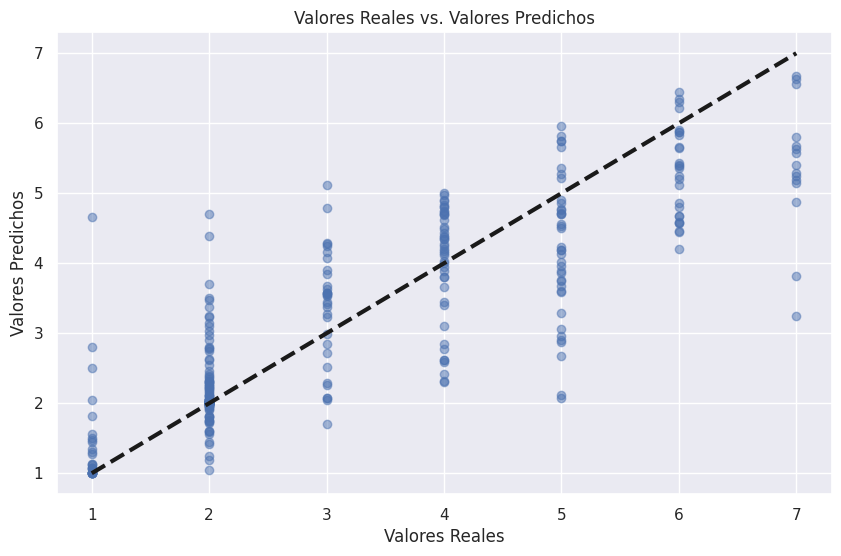

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
np.random.seed(21)

X = dt.drop(["PEI", "VolcanoID", "V_Name", 'Country', "Region", "Subregion"], axis=1)
y = dt["PEI"]

# Identificar columnas con string
object_cols = X.select_dtypes(include=['object']).columns

# Aplicar LabelEncoder a la columnas objeto
label_encoder = LabelEncoder()
for col in object_cols:
    X[col] = label_encoder.fit_transform(X[col])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

model = RandomForestRegressor()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Calcular las métricas de evaluación
mse = mean_squared_error(y_test, y_pred)

print('MSE: ',mse)

# Gráfica de valores reales vs. valores predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs. Valores Predichos')
plt.show()

# **RandomForestRegressor: n_stimators, max-depth and criterion**

MSE:  [1.2806451612903227, 0.8140645161290323, 0.8298709677419355, 0.8008954838709678, 0.8043364516129033]


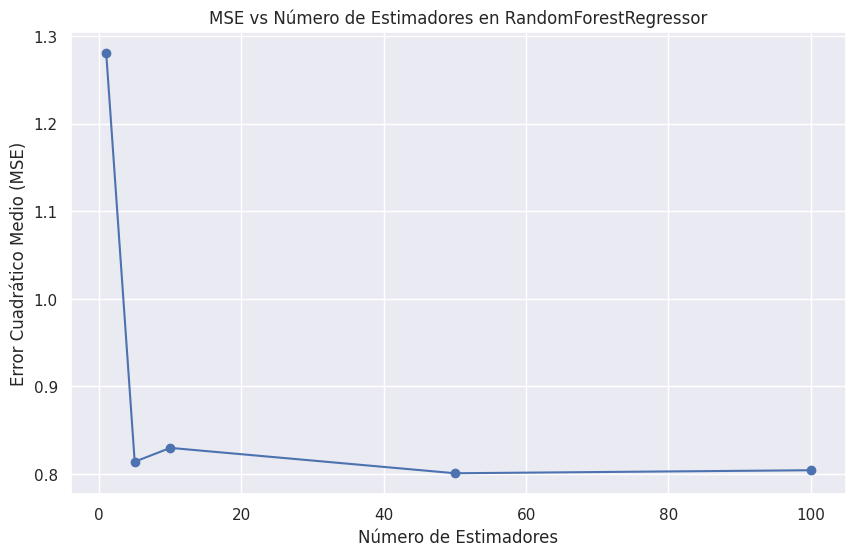

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
np.random.seed(21)


X = dt.drop(["PEI", "VolcanoID", "V_Name", 'Country', "Region", "Subregion"], axis=1)
y = dt["PEI"]

# Identificar columnas con string
object_cols = X.select_dtypes(include=['object']).columns

# Aplicar LabelEncoder a las columnas objeto
label_encoder = LabelEncoder()
for col in object_cols:
    X[col] = label_encoder.fit_transform(X[col])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# Lista de valores de n_estimators para probar
n_estimators_list = [1, 5, 10, 50, 100]
mse_list = []

# Entrenar y evaluar el modelo para cada valor de n_estimators
for n in n_estimators_list:
    regressor = RandomForestRegressor(n_estimators=n, max_depth=100, random_state=21)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)

print('MSE: ',mse_list)
# Gráfica de MSE vs n_estimators
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, mse_list, marker='o')
plt.xlabel('Número de Estimadores')
plt.ylabel('Error Cuadrático Medio (MSE)')
plt.title('MSE vs Número de Estimadores en RandomForestRegressor')
plt.grid(True)
plt.show()


# **SVR by default**

MSE:  1.9653271463910018


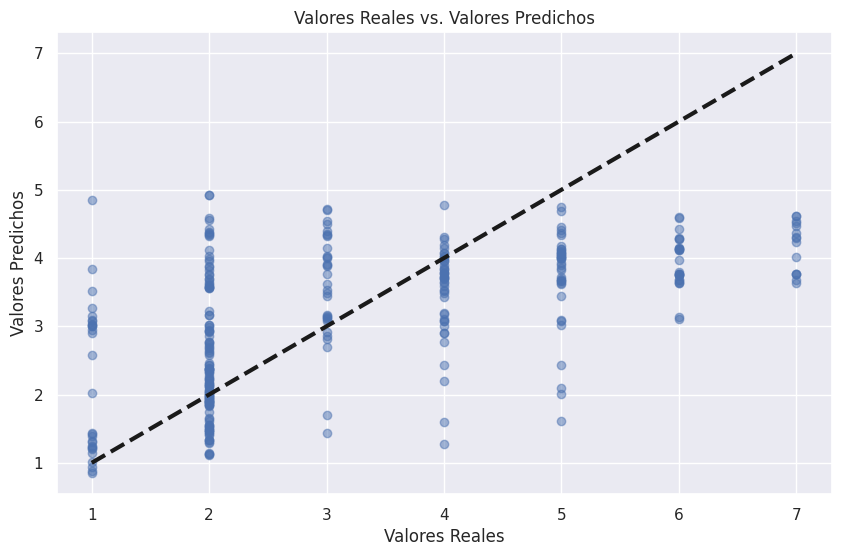

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
np.random.seed(21)


X = dt.drop(["PEI", "VolcanoID", "V_Name", 'Country', "Region", "Subregion"], axis=1)
y = dt["PEI"]

# Identificar columnas con string
object_cols = X.select_dtypes(include=['object']).columns

# Aplicar LabelEncoder a la columnas objeto
label_encoder = LabelEncoder()
for col in object_cols:
    X[col] = label_encoder.fit_transform(X[col])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
model = SVR()
model.fit(X_train, y_train)
# Hacer predicciones
y_pred = model.predict(X_test)
# Calcular las métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
print('MSE: ',mse)

# Gráfico de Valores Reales vs. Predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs. Valores Predichos')
plt.grid(True)
plt.show()

# **SVR with Kernel**

[1.7890078980717736, 1.7836291021452602, 1.401901261284475]


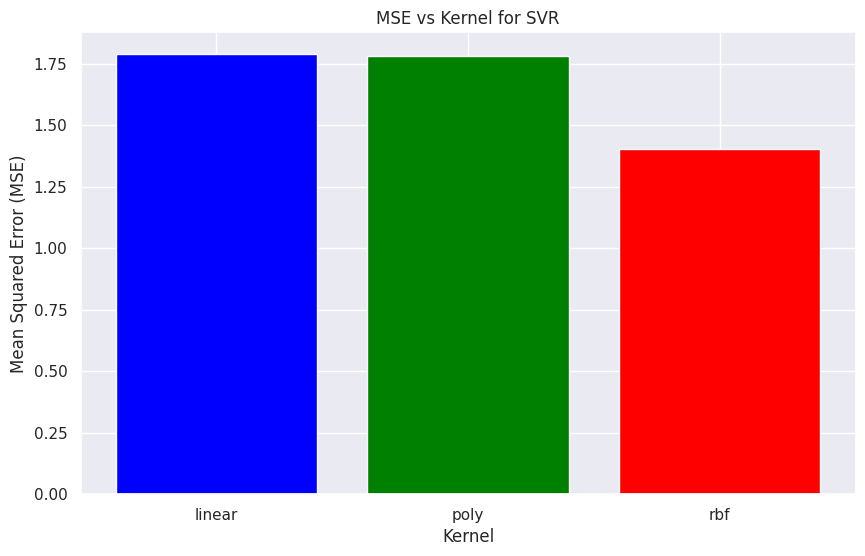

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
np.random.seed(21)


X = dt.drop(["PEI", "VolcanoID", "V_Name", 'Country', "Region", "Subregion"], axis=1)
y = dt["PEI"]

# Identificar columnas con string
object_cols = X.select_dtypes(include=['object']).columns

# Aplicar LabelEncoder a la columnas objeto
label_encoder = LabelEncoder()
for col in object_cols:
    X[col] = label_encoder.fit_transform(X[col])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

scores = []
kernels = ['linear', 'poly', 'rbf']
for k in kernels:
  est = SVR(kernel=k)
  est.fit(X_train, y_train)
  y_pred = est.predict(X_test)
  scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))

print(scores)

# Gráfica de RMSE vs Kernel
plt.figure(figsize=(10, 6))
plt.bar(kernels, scores, color=['blue', 'green', 'red'])
plt.xlabel('Kernel')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs Kernel for SVR')
plt.show()

# **Deep Learning - (capa entrada, capa oculta, capa salida)**

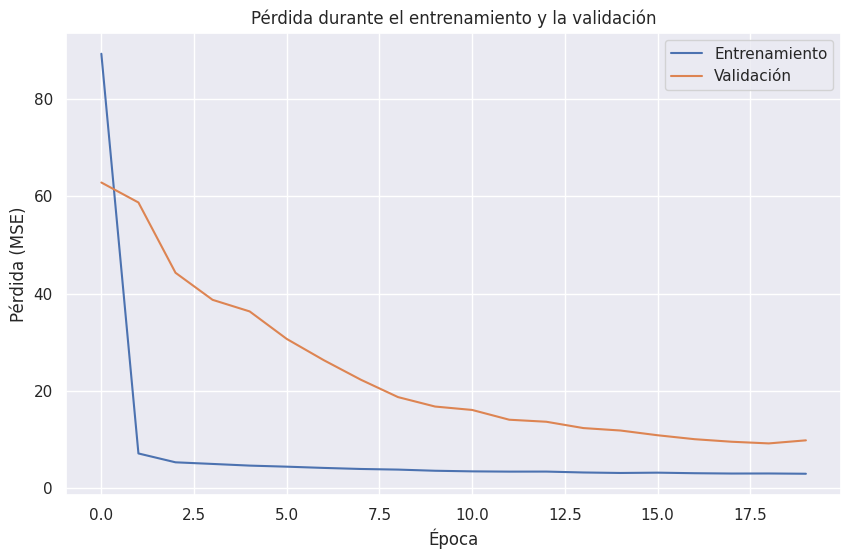

In [38]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

tf.random.set_seed(21)
np.random.seed(21)

# Supongamos que dt es el DataFrame que contiene tus datos
X = dt.drop(["PEI", "VolcanoID", "V_Name", 'Country', "Region", "Subregion"], axis=1)
y = dt["PEI"]

# Identificar columnas con string
object_cols = X.select_dtypes(include=['object']).columns

# Aplicar LabelEncoder a las columnas objeto
label_encoder = LabelEncoder()
for col in object_cols:
    X[col] = label_encoder.fit_transform(X[col])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, shuffle=False)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[X_train.shape[1]]),  # capa de entrada
    tf.keras.layers.Dense(20, activation='relu'),  # capa oculta
    tf.keras.layers.Dense(1)  # capa de salida
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
history = model.fit(X_train, y_train, epochs=20, verbose=0, validation_data=(X_test, y_test))

# Gráfica de la pérdida (loss) durante el entrenamiento
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.xlabel('Época')
plt.ylabel('Pérdida (MSE)')
plt.title('Pérdida durante el entrenamiento y la validación')
plt.legend()
plt.grid(True)
plt.show()



# **Deep Learning - (capa entrada, (3) capas ocultas, capa salida)**

10/10 [==============================] - 0s 2ms/step
Accuracy Score: 6.7004


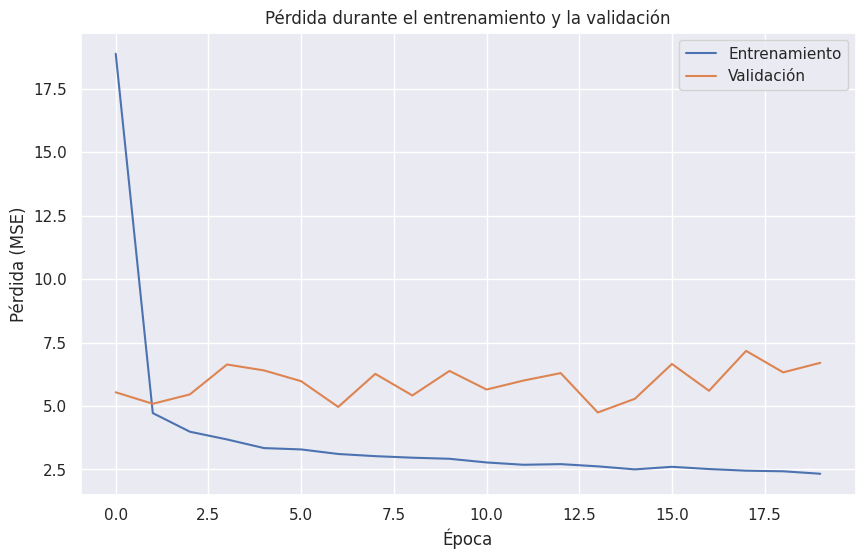

In [40]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

tf.random.set_seed(21)
np.random.seed(21)

# Suponiendo que dt es el DataFrame que contiene tus datos
X = dt.drop(["PEI", "VolcanoID", "V_Name", 'Country', "Region", "Subregion"], axis=1)
y = dt["PEI"]

# Identificar columnas con string
object_cols = X.select_dtypes(include=['object']).columns

# Aplicar LabelEncoder a las columnas objeto
label_encoder = LabelEncoder()
for col in object_cols:
    X[col] = label_encoder.fit_transform(X[col])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=21)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[X_train.shape[1]]),  # capa de entrada
    tf.keras.layers.Dense(20, activation='relu'),  # capa oculta
    tf.keras.layers.Dense(20, activation='relu'),  # capa oculta
    tf.keras.layers.Dense(20, activation='relu'),  # capa oculta
    tf.keras.layers.Dense(1)  # capa de salida para regresión
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
history = model.fit(X_train, y_train, epochs=20, verbose=0, validation_data=(X_test, y_test))
y_pred = model.predict(X_test)
accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
print(f"Accuracy Score: {accuracy:.4f}")

# Gráfica de la pérdida (MSE) durante el entrenamiento
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.xlabel('Época')
plt.ylabel('Pérdida (MSE)')
plt.title('Pérdida durante el entrenamiento y la validación')
plt.legend()
plt.grid(True)
plt.show()



# **Deep Learning - (capa entrada, (6) capas ocultas, capa salida)**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
tf.random.set_seed(21)
np.random.seed(21)
X = dt.drop(["PEI", "VolcanoID", "V_Name", 'Country', "Region", "Subregion"], axis=1)
y = dt["PEI"]

# Identifica columnas de tipo string
object_cols = X.select_dtypes(include=['object']).columns

# Aplicar labelEncoder

label_encoder = LabelEncoder()
for col in object_cols:
    X[col] = label_encoder.fit_transform(X[col])

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, shuffle=False)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape=[X_train.shape[1]]), #capa de entrada
  tf.keras.layers.Dense(20, activation=tf.nn.relu), #capa oculta
  tf.keras.layers.Dense(20, activation=tf.nn.relu), #capa oculta
  tf.keras.layers.Dense(20, activation=tf.nn.relu), #capa oculta
  tf.keras.layers.Dense(20, activation=tf.nn.relu), #capa oculta
  tf.keras.layers.Dense(20, activation=tf.nn.relu), #capa oculta
  tf.keras.layers.Dense(20, activation=tf.nn.relu), #capa oculta
  tf.keras.layers.Dense(30, activation=tf.nn.sigmoid) #capa de salida
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, verbose=0)
y_pred = model.predict(X_test)
accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
print(f"Accuracy Score: {accuracy:.4f}")

10/10 [==============================] - 0s 2ms/step
Accuracy Score: 0.5452


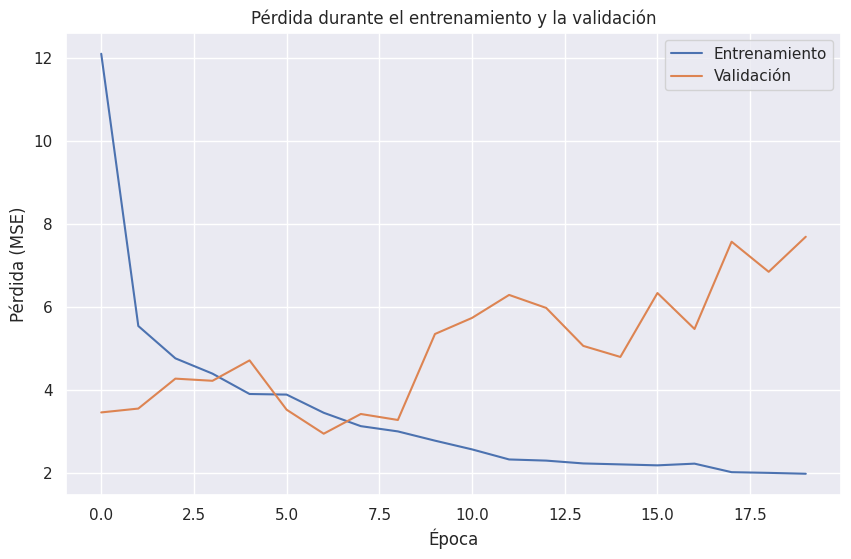

10/10 [==============================] - 0s 2ms/step
Accuracy Score: 7.6949


In [42]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

tf.random.set_seed(21)
np.random.seed(21)

# Supongamos que dt es el DataFrame que contiene tus datos
X = dt.drop(["PEI", "VolcanoID", "V_Name", 'Country', "Region", "Subregion"], axis=1)
y = dt["PEI"]

# Identificar columnas con string
object_cols = X.select_dtypes(include=['object']).columns

# Aplicar LabelEncoder a las columnas objeto
label_encoder = LabelEncoder()
for col in object_cols:
    X[col] = label_encoder.fit_transform(X[col])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=21)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[X_train.shape[1]]),  # capa de entrada
    tf.keras.layers.Dense(20, activation='relu'),  # capa oculta
    tf.keras.layers.Dense(20, activation='relu'),  # capa oculta
    tf.keras.layers.Dense(20, activation='relu'),  # capa oculta
    tf.keras.layers.Dense(20, activation='relu'),  # capa oculta
    tf.keras.layers.Dense(20, activation='relu'),  # capa oculta
    tf.keras.layers.Dense(20, activation='relu'),  # capa oculta
    tf.keras.layers.Dense(1)  # capa de salida para regresión
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
history = model.fit(X_train, y_train, epochs=20, verbose=0, validation_data=(X_test, y_test))

# Gráfica de la pérdida (MSE) durante el entrenamiento
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.xlabel('Época')
plt.ylabel('Pérdida (MSE)')
plt.title('Pérdida durante el entrenamiento y la validación')
plt.legend()
plt.grid(True)
plt.show()


y_pred = model.predict(X_test)
accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
print(f"Accuracy Score: {accuracy:.4f}")


